In [84]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [85]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [86]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [87]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [88]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

604

In [89]:
#Section 6.2.2 - The Python Requests Library

import requests
requests.__version__

'2.24.0'

In [90]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [91]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4c06927c79c650ac5bc24c411a5fb59e


In [92]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [93]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | avarua
Processing Record 2 of Set 1 | chokurdakh
Processing Record 3 of Set 1 | torbay
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | dingle
Processing Record 6 of Set 1 | hithadhoo
Processing Record 7 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | pitimbu
Processing Record 10 of Set 1 | bredasdorp
Processing Record 11 of Set 1 | khatanga
Processing Record 12 of Set 1 | jamestown
Processing Record 13 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 14 of Set 1 | butaritari
Processing Record 15 of Set 1 | ancud
Processing Record 16 of Set 1 | atuona
Processing Record 17 of Set 1 | hilo
Processing Record 18 of Set 1 | yumen
Processing Record 19 of Set 1 | ambilobe
Processing Record 20 of Set 1 | kodiak
Processing Record 21 of Set 1 | upernavik
Processing Record 22 of Set 1 | shanghai
Proce

Processing Record 39 of Set 4 | oranjemund
Processing Record 40 of Set 4 | katobu
Processing Record 41 of Set 4 | barmer
Processing Record 42 of Set 4 | ozinki
Processing Record 43 of Set 4 | alihe
Processing Record 44 of Set 4 | rawannawi
City not found. Skipping...
Processing Record 45 of Set 4 | aksarka
Processing Record 46 of Set 4 | toliary
City not found. Skipping...
Processing Record 47 of Set 4 | grand river south east
City not found. Skipping...
Processing Record 48 of Set 4 | alofi
Processing Record 49 of Set 4 | sabang
Processing Record 50 of Set 4 | fort nelson
Processing Record 1 of Set 5 | de-kastri
Processing Record 2 of Set 5 | felnac
Processing Record 3 of Set 5 | juneau
Processing Record 4 of Set 5 | okhotsk
Processing Record 5 of Set 5 | yantzaza
Processing Record 6 of Set 5 | banda aceh
Processing Record 7 of Set 5 | faanui
Processing Record 8 of Set 5 | aasiaat
Processing Record 9 of Set 5 | khersonisos
City not found. Skipping...
Processing Record 10 of Set 5 | pa

Processing Record 27 of Set 8 | solnechnyy
Processing Record 28 of Set 8 | brive-la-gaillarde
Processing Record 29 of Set 8 | kabalo
Processing Record 30 of Set 8 | ryotsu
Processing Record 31 of Set 8 | plettenberg bay
Processing Record 32 of Set 8 | paamiut
Processing Record 33 of Set 8 | dongning
Processing Record 34 of Set 8 | fare
Processing Record 35 of Set 8 | pendleton
Processing Record 36 of Set 8 | abalak
Processing Record 37 of Set 8 | bafoulabe
Processing Record 38 of Set 8 | skjervoy
Processing Record 39 of Set 8 | meadow lake
Processing Record 40 of Set 8 | odienne
Processing Record 41 of Set 8 | borlange
City not found. Skipping...
Processing Record 42 of Set 8 | mansa
Processing Record 43 of Set 8 | alamos
Processing Record 44 of Set 8 | guymon
Processing Record 45 of Set 8 | pozo colorado
Processing Record 46 of Set 8 | mabaruma
Processing Record 47 of Set 8 | avera
Processing Record 48 of Set 8 | warragul
Processing Record 49 of Set 8 | mumford
Processing Record 50 of

Processing Record 16 of Set 12 | tautira
Processing Record 17 of Set 12 | altonia
City not found. Skipping...
Processing Record 18 of Set 12 | arman
Processing Record 19 of Set 12 | karratha
Processing Record 20 of Set 12 | trang
Processing Record 21 of Set 12 | tymovskoye
Processing Record 22 of Set 12 | norman wells
Processing Record 23 of Set 12 | vao
Processing Record 24 of Set 12 | salina cruz
Processing Record 25 of Set 12 | kaliyaganj
Processing Record 26 of Set 12 | pekan
Processing Record 27 of Set 12 | xingyi
Processing Record 28 of Set 12 | aviles
Processing Record 29 of Set 12 | ailigandi
Processing Record 30 of Set 12 | namibe
Processing Record 31 of Set 12 | vuktyl
Processing Record 32 of Set 12 | selianitika
Processing Record 33 of Set 12 | beinamar
Processing Record 34 of Set 12 | kandrian
Processing Record 35 of Set 12 | khonuu
City not found. Skipping...
Processing Record 36 of Set 12 | makakilo city
Processing Record 37 of Set 12 | samusu
City not found. Skipping...


In [94]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Avarua,-21.21,-159.78,77.00,88,20,11.41,CK,2020-11-17 08:18:14
1,Chokurdakh,70.63,147.92,-7.85,91,100,4.94,RU,2020-11-17 08:19:30
2,Torbay,47.67,-52.73,48.00,93,90,23.04,CA,2020-11-17 08:19:30
3,Albany,42.60,-73.97,37.00,63,65,4.63,US,2020-11-17 08:16:00
4,Dingle,11.00,122.67,83.44,81,100,9.33,PH,2020-11-17 08:19:31
5,Hithadhoo,-0.60,73.08,82.18,78,100,21.88,MV,2020-11-17 08:19:31
6,Ushuaia,-54.80,-68.30,41.00,80,75,27.51,AR,2020-11-17 08:16:09
7,Pitimbu,-7.47,-34.81,73.40,100,20,8.16,BR,2020-11-17 08:19:32
8,Bredasdorp,-34.53,20.04,64.40,88,75,11.41,ZA,2020-11-17 08:19:32
9,Khatanga,71.97,102.50,14.27,96,100,19.48,RU,2020-11-17 08:19:33


In [95]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [96]:
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Avarua,CK,2020-11-17 08:18:14,-21.21,-159.78,77.00,88,20,11.41
1,Chokurdakh,RU,2020-11-17 08:19:30,70.63,147.92,-7.85,91,100,4.94
2,Torbay,CA,2020-11-17 08:19:30,47.67,-52.73,48.00,93,90,23.04
3,Albany,US,2020-11-17 08:16:00,42.60,-73.97,37.00,63,65,4.63
4,Dingle,PH,2020-11-17 08:19:31,11.00,122.67,83.44,81,100,9.33
5,Hithadhoo,MV,2020-11-17 08:19:31,-0.60,73.08,82.18,78,100,21.88
6,Ushuaia,AR,2020-11-17 08:16:09,-54.80,-68.30,41.00,80,75,27.51
7,Pitimbu,BR,2020-11-17 08:19:32,-7.47,-34.81,73.40,100,20,8.16
8,Bredasdorp,ZA,2020-11-17 08:19:32,-34.53,20.04,64.40,88,75,11.41
9,Khatanga,RU,2020-11-17 08:19:33,71.97,102.50,14.27,96,100,19.48


In [97]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

# 6.3.1

In [98]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

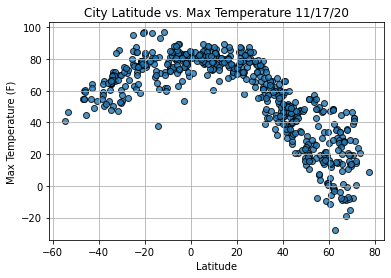

In [99]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

# 6.3.2

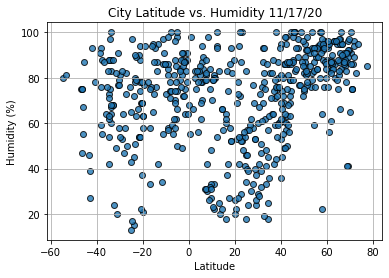

In [100]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

# Refactored code changes y-axis and y-label

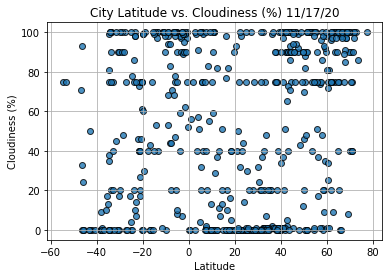

In [101]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

# Refactored code changes y-axis and y-label

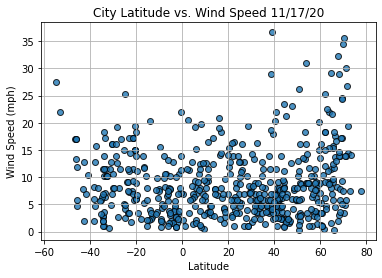

In [102]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

# Refactored code changes y-axis and y-label